In [1]:
from client import start_client
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.pyplot import figure
from main_func import main,real_partial
from plotting import plot, plot_workers, plot_speedup
from jupyterthemes import jtplot

client,w=start_client(29)
client

<Client: 'tcp://127.0.0.1:36373' processes=29 threads=29, memory=33.69 GB>


Client Scheduler: tcp://127.0.0.1:36373 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 29 Cores: 29 Memory: 33.69 GB


### Main function
- make_classification parameters: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification
- choose e, and chunk size
- run multiple times to produce plots


### Initialize
***

In [2]:
jtplot.style(theme='grade3') #light plot theme

batches=30000 #number of minibatches
batch_size=1 #size of each minibatch
e=0.8 #tolerance for φ(χ)

#compute samples size
training_s=batches*batch_size
n_samples=int(3*training_s/2) # 1/3 of the samples will be used for testing

#parameters for make classification
dataset_params={
    "n_samples":n_samples,
    "n_features":1000,
    "n_informative":10,
    "n_redundant":0,
    "n_repeated":0,
    "n_classes":2,
    "n_clusters_per_class":1,
    "flip_y":0,
    "weights":[0.7,0.3],
    "random_state":17
}
threshold=0.03

chunks=100
e_array=[0.3]
sizes=[30000,50000,100000,150000,200000,300000]
minibatches=[10,50,100]
new="no" #choose if you want to recreate the dataset

### Dataset with no noise flip_y=0
***
#### Balanced
- weights=[0.5,0,5]

In [3]:
# 3 different e
new="no"
dataset_params["weights"]=[0.5,0.5]
Acc_threshold=[]
Rounds_threshold=[]
Time_threshold=[]
labels=[[]]

for i in e_array :
    e=i
    Acc,time_l,total_rounds,total_time=main(client,w,new,dataset_params,e,chunks,minibatches[0])
    new="no"
    Acc_threshold.append(Acc)
    Rounds_threshold.append(total_rounds)
    Time_threshold.append(time_l)
    time.sleep(5)

-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.3
Minibatch size: 30.0
Number of chunks for each worker:  3
In progress...
[1, 28, 0.27009057998657227]
Accuracy: 92.326667
[2, 28, 0.6043832302093506]
Accuracy: 93.540000
[1, 23, 0.8549120426177979]
Accuracy: 93.980000
[1, 4, 1.1390330791473389]
Accuracy: 91.406667
[1, 0, 1.232323169708252]
Accuracy: 91.360000

**
 Pass 0 completed
**

[1, 0, 0.314831018447876]
Accuracy: 94.080000

**
 Pass 1 completed
**

Total time [1.232323169708252, 0.314831018447876]


In [3]:
# centr=client.submit(real_partial,minibatches[1],workers=w[0])
# time_centr,Acc_real1,f_acc=centr.result()
time_centr,Acc_real1,f_acc=real_partial(1)
len_real1=np.array([i for i in range(len(Acc_real1))])
labels='centralized'
np.save('np_arrays/time_centr',time_centr)
np.save('np_arrays/Acc_real1',Acc_real1)
np.save('np_arrays/f_acc',f_acc)

Start...
----------------------------------------------

chunk 1
Minibaches 0
Accuracy: 80.040000
chunk 2
Minibaches 0
Accuracy: 83.386667
chunk 3
Minibaches 0
Accuracy: 85.413333
chunk 4
Minibaches 0
Accuracy: 85.186667
chunk 5
Minibaches 0
Accuracy: 85.900000
chunk 6
Minibaches 0
Accuracy: 88.313333
chunk 7
Minibaches 0
Accuracy: 88.366667
chunk 8
Minibaches 0
Accuracy: 88.306667
chunk 9
Minibaches 0
Accuracy: 88.886667
chunk 10
Minibaches 0
Accuracy: 88.900000
chunk 11
Minibaches 0
Accuracy: 89.253333
chunk 12
Minibaches 0
Accuracy: 89.080000
chunk 13
Minibaches 0
Accuracy: 89.626667
chunk 14
Minibaches 0
Accuracy: 89.686667
chunk 15
Minibaches 0
Accuracy: 89.706667
chunk 16
Minibaches 0
Accuracy: 90.093333
chunk 17
Minibaches 0
Accuracy: 89.773333
chunk 18
Minibaches 0
Accuracy: 89.740000
chunk 19
Minibaches 0
Accuracy: 89.786667
chunk 20
Minibaches 0
Accuracy: 90.033333
chunk 21
Minibaches 0
Accuracy: 90.213333
chunk 22
Minibaches 0
Accuracy: 89.800000
chunk 23
Minibaches 0
Accura

chunk 99
Minibaches 0
Accuracy: 92.413333
chunk 100
Minibaches 0
Accuracy: 92.453333
NO Chunks...
TIME : 0.21130847930908203
Ended 1


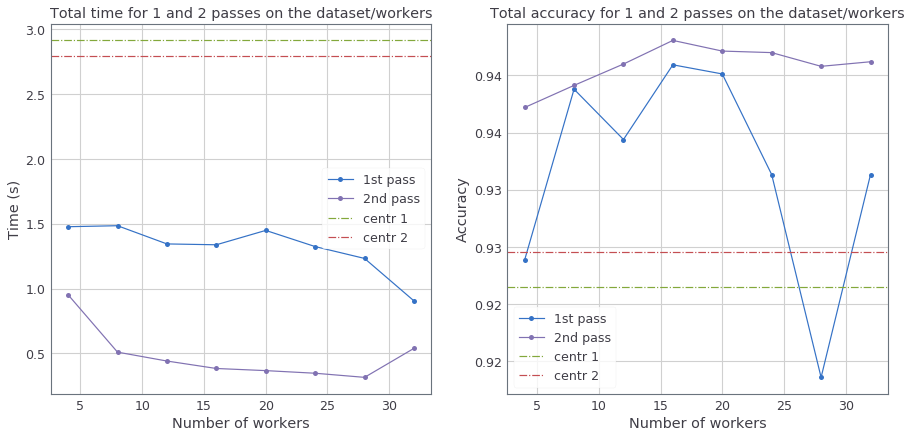

No handles with labels found to put in legend.


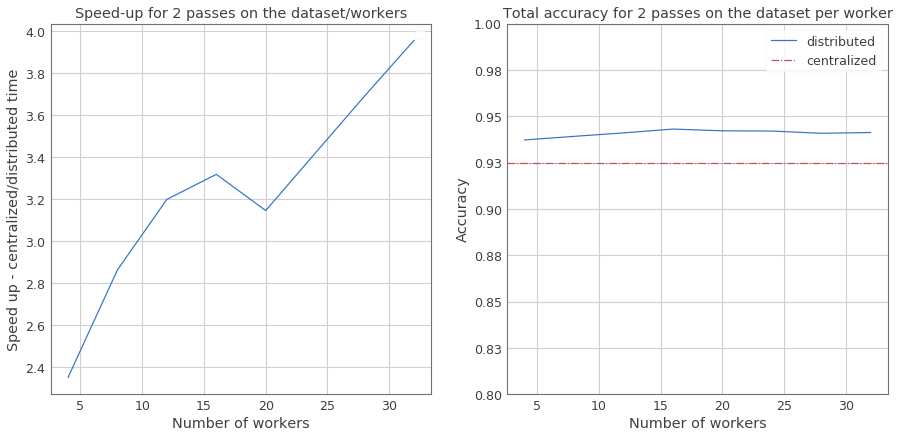

In [4]:
time_centr=np.load('np_arrays/time_centr.npy')
f_acc=np.load('np_arrays/f_acc.npy')
plot_workers([4,8,12,16,20,24,28,32],time_centr,f_acc)
plot_speedup([4,8,12,16,20,24,28,32],time_centr,f_acc)

In [6]:
from IPython.display import Audio, display
display(Audio(url='http://peal.io/download/5e289.wav', autoplay=True))
# http://peal.io/download/mr5xx.wav

In [7]:
# Acc_minibatch=[]
# Rounds_minibatch=[]
# Time_minibatch=[]
# e=0.2
# for i in minibatches :
#     minibatch=i
#     Acc,n_rounds,time_stamps=main(client,w,new,dataset_params,e,chunks,minibatch)
#     new="no"
#     Acc_minibatch.append(Acc)
#     Rounds_minibatch.append(n_rounds)
#     Time_minibatch.append(time_stamps)
#     time.sleep(5)

In [8]:
# name="Plots/Minibatch_4x_w_"+str(len(w))+"_samples_"+str(dataset_params["n_samples"])+"_features_"+str(dataset_params["n_features"])+"_minib_"+str(minibatches)+".png"
# plot(l1,l2,Acc_minibatch,Rounds_minibatch,Time_minibatch,minibatches,labels,name,'minibatches')

distributed.core - ERROR - 'Client-9ad4cf9a-bc82-11ea-b820-457dcf7a48c9'
Traceback (most recent call last):
  File "/home/skampioti/anaconda3/lib/python3.7/site-packages/distributed/core.py", line 473, in handle_stream
    handler(**merge(extra, msg))
  File "/home/skampioti/anaconda3/lib/python3.7/site-packages/distributed/pubsub.py", line 86, in remove_subscriber
    self.client_subscribers[name].remove(client)
KeyError: 'Client-9ad4cf9a-bc82-11ea-b820-457dcf7a48c9'
distributed.core - ERROR - 'Client-9ad4cf9a-bc82-11ea-b820-457dcf7a48c9'
Traceback (most recent call last):
  File "/home/skampioti/anaconda3/lib/python3.7/site-packages/distributed/core.py", line 412, in handle_comm
    result = await result
  File "/home/skampioti/anaconda3/lib/python3.7/site-packages/distributed/scheduler.py", line 2495, in add_client
    await self.handle_stream(comm=comm, extra={"client": client})
  File "/home/skampioti/anaconda3/lib/python3.7/site-packages/distributed/core.py", line 473, in handle_

### Save results

In [9]:
# f = open("result.txt", "a")
# f.writelines(["\n\n==========================================================================="])
# f.writelines(["\nNEW EXPERIMENT:\nparams:",str(dataset_params),"\nminibaches_size:"
#               ,str(minibatches),"\ndifferent e's:",str(e_array),"\nn_workers: ",str(len(w))])
# f.writelines(["\n___________________________________________________________________________"])
# f.writelines(["\nRESULTS:\nAcc_threshold",str(Acc_threshold),"\nRounds_threshold",str(Rounds_threshold),
#              "\nTime_threshold",str(Time_threshold),"\nlen_real1",str(len_real1),"\nAcc_real1",str(Acc_real1)])
# f.close()

### Shutdown client

In [10]:
client.close()
client.shutdown()